# 1. Install and Import Dependencies

In [ ]:
#this failed for me so i just ran: pip3 install torch torchvision
#%pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image

In [ ]:
%pip list

# 2. Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [ ]:
model

# 3. Make Detections with Images

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [ ]:
import uuid   # Unique identifier
import os
import time

In [63]:
IMAGES_PATH = os.path.join('data-drowsiness', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20
IMAGES_PATH

'data-drowsiness/images'

In [57]:
!pwd

/Users/joereger/Dropbox (Personal)/AI/DrowsinessDetection


In [64]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            print('User input received, breaking')
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
%pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YNA9U93ptJUyptTuEULl")
project = rf.workspace("joe-reger-kvbji").project("drowsiness-3ct6f")
dataset = project.version(1).download("yolov5")

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc
#python labelImg.py to start the UI

In [7]:
#original. need to tag in labelImg and save in Yolo format
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 20 --data ../data-drowsiness/dataset.yaml --weights yolov5s.pt --workers 2

#my version after using robo thing
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data data/drowsiness-1/data.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=../data-drowsiness/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `git -C /Users/joereger/Dropbox (Personal)/AI/DrowsinessDetection/yolov5 describe --tags --long --always'
YOLOv5 🚀 2023-8-23 Python-3.10.9 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/19         0G    0.06434    0.03212     0.0274         22        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         56         56    0.00334          1     0.0529     0.0155

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/19         0G    0.05932    0.02902    0.02711         14        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         56         56    0.00334          1     0.0991     0.0446

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      11/19         0G    0.05438    0.02795    0.02699         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         56         56     0.0196          1      0.271      0.103

      Epo

# 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp8/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/joereger/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-25 Python-3.10.9 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
#img_test = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
#results = model(img_test)
#results.print()

image 1/1: 720x1280 (no detections)
Speed: 36.2ms pre-process, 75.6ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


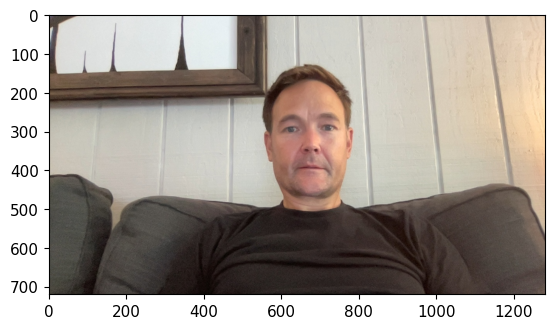

In [5]:
img = os.path.join('data-drowsiness', 'images', 'awake.8989843e-4284-11ee-b354-cee11be7a326.jpg')
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()